In [2]:
# lets import all the required libraries

# for mathematical operations
import numpy as np
# for dataframe operations
import pandas as pd

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# setting up the size of the figures
plt.rcParams['figure.figsize'] = (16, 5)
# setting up the style of the plot
plt.style.use('fivethirtyeight')

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact
from imblearn.over_sampling import SMOTE

# for machine learning
import sklearn
import imblearn

ModuleNotFoundError: No module named 'imblearn'

In [3]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [4]:
# lets also check the shape of the dataset
print(test.shape)

(23490, 13)


In [5]:
test.head()

employee_id         department     region   education gender  \
0         8724         Technology  region_26  Bachelor's      m   
1        74430                 HR   region_4  Bachelor's      f   
2        72255  Sales & Marketing  region_13  Bachelor's      m   
3        38562        Procurement   region_2  Bachelor's      f   
4        64486            Finance  region_29  Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   24                   NaN   
1               other                1   31                   3.0   
2               other                1   31                   1.0   
3               other                3   31                   2.0   
4            sourcing                1   30                   4.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
0                  1              1            0                  77  
1                  5              0            0                  51  
2                  4              0            0                  47  
3                  9              0            0                  65  
4                  7              0            0                  61

In [6]:
train.head()


employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

In [7]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 4.8+ MB


C:\Users\Shyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


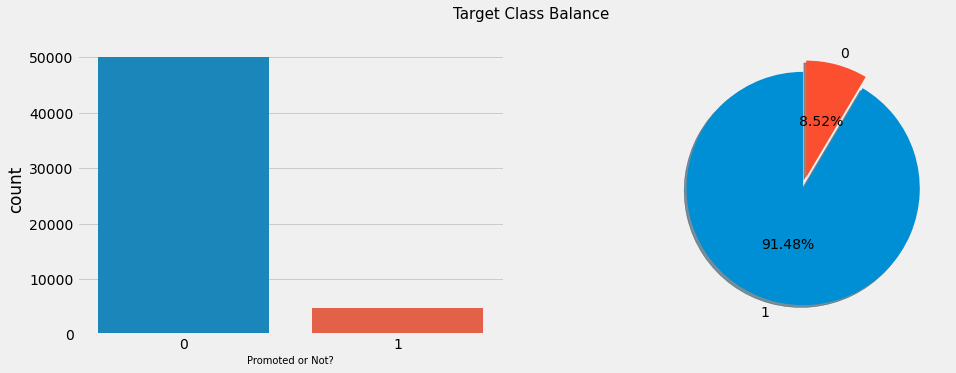

In [8]:
# lets check the Target Class Balance

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(train['is_promoted'],)

plt.xlabel('Promoted or Not?', fontsize = 10)

plt.subplot(1, 2, 2)
train['is_promoted'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['1','0'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()

In [9]:
train.describe(include = 'object')

department    region   education gender recruitment_channel
count               54808     54808       52399  54808               54808
unique                  9        34           3      2                   3
top     Sales & Marketing  region_2  Bachelor's      m               other
freq                16840     12343       36669  38496               30446

In [10]:
# Lets make an interactive function to check the statistics of these numerical columns at a time

@interact
def check(column = list(train.select_dtypes('number').columns[1:8])):
    print("Maximum Value :", train[column].max())
    print("Minimum Value :", train[column].min())
    print("Mean : {0:.2f}".format(train[column].mean()))
    print("Median :", train[column].median())
    print("Standard Deviation :  {0:.2f}".format(train[column].std()))

interactive(children=(Dropdown(description='column', options=('no_of_trainings', 'age', 'previous_year_rating'…

In [11]:
#Treating the Missing Values

In [12]:
# missing values in training data set

# lets calculate the total missing values in the dataset
train_total = train.isnull().sum()

# lets calculate the percentage of missing values in the dataset
train_percent = ((train.isnull().sum()/train.shape[0])*100).round(2)

# lets calculate the total missing values in the dataset
test_total = test.isnull().sum()

# lets calculate the percentage of missing values in the dataset
test_percent = ((test.isnull().sum()/test.shape[0])*100).round(2)

# lets make a dataset consisting of total no. of missing values and percentage of missing values in the dataset
train_missing_data = pd.concat([train_total, train_percent, test_total, test_percent],
                                axis=1, 
                                keys=['Train_Total', 'Train_Percent %','Test_Total', 'Test_Percent %'],
                                sort = True)

# lets check the head
train_missing_data.style.bar(color = ['gold'])

In [13]:
# checking datatype of columns in the data
train.dtypes[train.isnull().any()]


education                object
previous_year_rating    float64
dtype: object

In [14]:
# lets impute the missing values in the Training Data

train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", train.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


In [15]:
# lets impute the missing values in the Testing Data

test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", test.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


In [16]:
#Univariate Analysis

In [17]:
train.select_dtypes('number').head()

employee_id  no_of_trainings  age  previous_year_rating  length_of_service  \
0        65438                1   35                   5.0                  8   
1        65141                1   30                   5.0                  4   
2         7513                1   34                   3.0                  7   
3         2542                2   39                   1.0                 10   
4        48945                1   45                   3.0                  2   

   KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
0              1            0                  49            0  
1              0            0                  60            0  
2              0            0                  50            0  
3              0            0                  50            0  
4              0            0                  73            0

C:\Users\Shyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


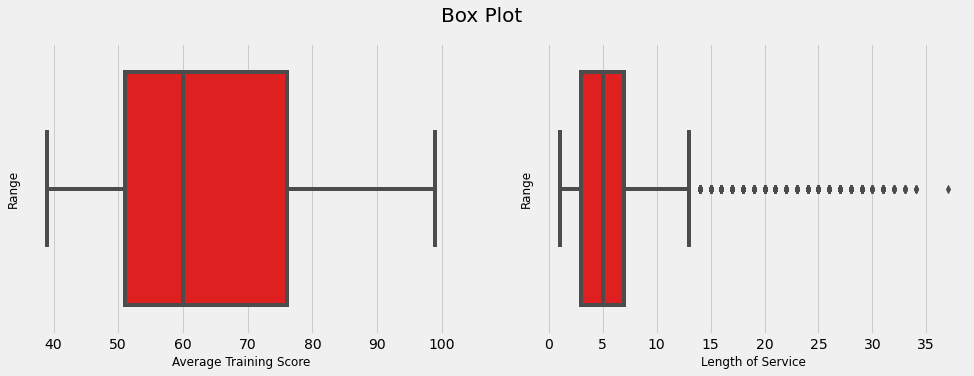

In [18]:
# lets check the boxplots for the columns where we suspect for outliers
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Box plot for average training score
plt.subplot(1, 2, 1)
sns.boxplot(train['avg_training_score'], color = 'red')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for length of service
plt.subplot(1, 2, 2)
sns.boxplot(train['length_of_service'], color = 'red')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

C:\Users\Shyam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shyam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


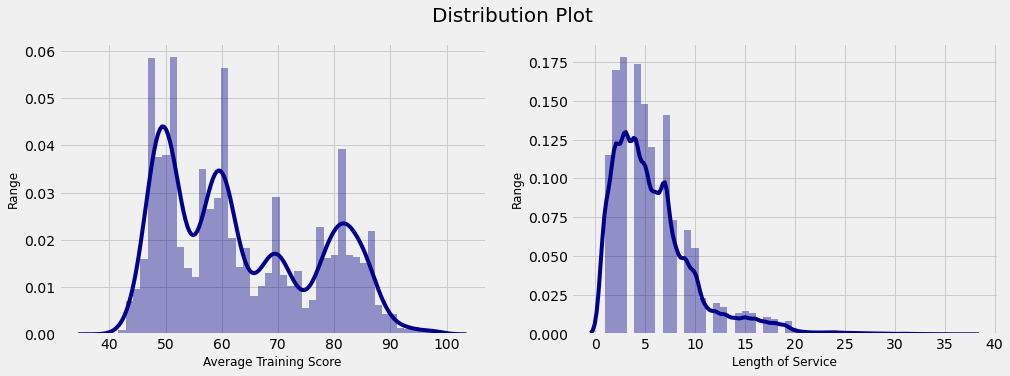

In [19]:
# Lets check the distribution for the columns for which we suspect for the outliers
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Distribution plot for Average training score
plt.subplot(1, 2, 1)
sns.distplot(train['avg_training_score'], color = 'darkblue')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Distribution plot for Length of Service
plt.subplot(1, 2, 2)
sns.distplot(train['length_of_service'], color = 'darkblue')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Distribution Plot', fontsize = 20)
plt.show()


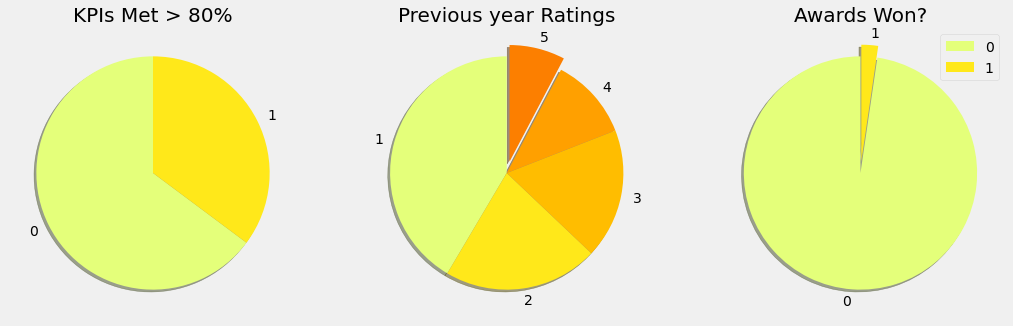

In [20]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 1)
labels = ['0','1']
sizes = train['KPIs_met >80%'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('KPIs Met > 80%', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = ['1', '2', '3', '4', '5']
sizes = train['previous_year_rating'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Previous year Ratings', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 3)
labels = ['0', '1']
sizes = train['awards_won?'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Awards Won?', fontsize = 20)


plt.legend()
plt.show()

C:\Users\Shyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


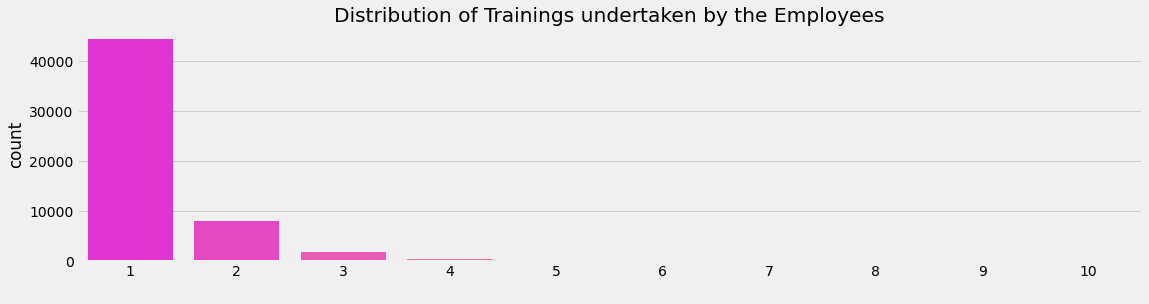

In [21]:
# lets check the distribution of trainings undertaken by the employees

plt.rcParams['figure.figsize'] = (17, 4)
sns.countplot(train['no_of_trainings'], palette = 'spring')
plt.xlabel(' ', fontsize = 14)
plt.title('Distribution of Trainings undertaken by the Employees')
plt.show()

C:\Users\Shyam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


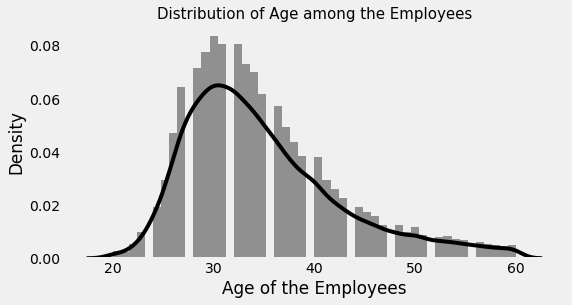

In [22]:
# lets check the Age of the Employees

plt.rcParams['figure.figsize'] = (8, 4)
sns.distplot(train['age'], color = 'black')
plt.title('Distribution of Age among the Employees', fontsize = 15)
plt.xlabel('Age of the Employees')
plt.grid()
plt.show()

In [23]:
train.select_dtypes('object').head()

department     region         education gender recruitment_channel
0  Sales & Marketing   region_7  Master's & above      f            sourcing
1         Operations  region_22        Bachelor's      m               other
2  Sales & Marketing  region_19        Bachelor's      m            sourcing
3  Sales & Marketing  region_23        Bachelor's      m               other
4         Technology  region_26        Bachelor's      m               other

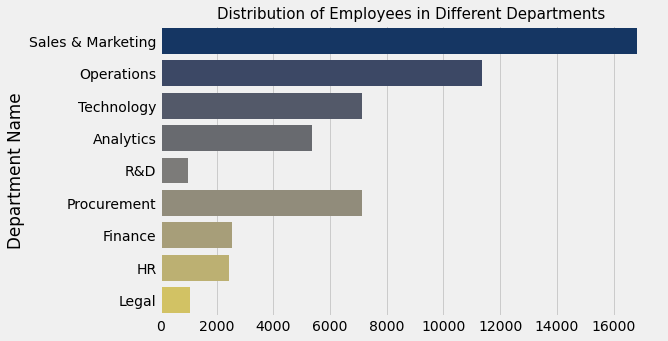

In [24]:
# lets check different Departments

plt.rcParams['figure.figsize'] = (8, 5)
sns.countplot(y = train['department'], palette = 'cividis', orient = 'v')
plt.xlabel('')
plt.ylabel('Department Name')
plt.title('Distribution of Employees in Different Departments', fontsize = 15)

plt.show()

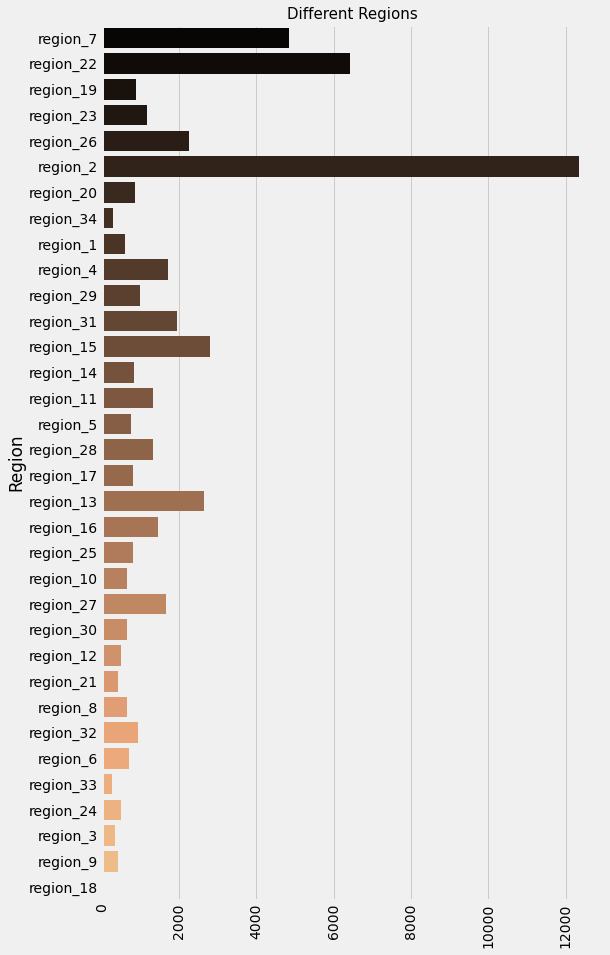

In [25]:
# lets check distribution of different Regions

plt.rcParams['figure.figsize'] = (8,15)
sns.countplot(y = train['region'], palette = 'copper', orient = 'v')
plt.xlabel('')
plt.ylabel('Region')
plt.title('Different Regions', fontsize = 15)
plt.xticks(rotation = 90)

plt.show()

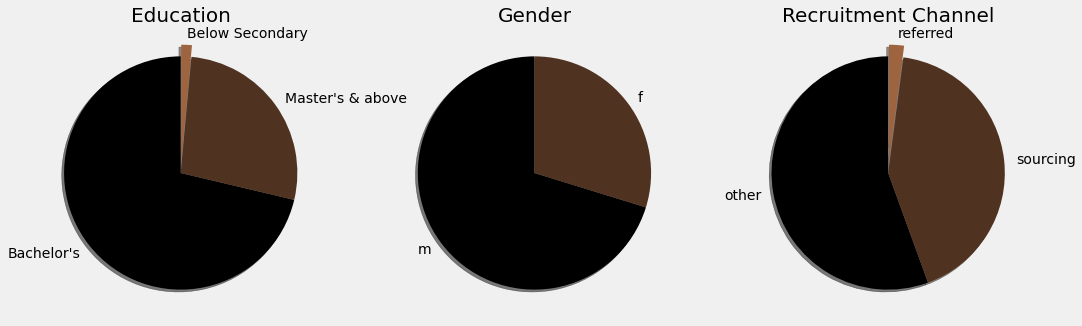

In [26]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 1)
labels = train['education'].value_counts().index
sizes = train['education'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Education', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = train['gender'].value_counts().index
sizes = train['gender'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Gender', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 3)
labels = train['recruitment_channel'].value_counts().index
sizes = train['recruitment_channel'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0,0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Recruitment Channel', fontsize = 20)

plt.show()

In [27]:
# interactive function for plotting univariate charts for categorical data

plt.rcParams['figure.figsize'] = (15, 4)
@interact_manual
def check(column = list(train.select_dtypes('object').columns),
          palette = ['cividis','copper','spring','Reds','Blues']):
    sns.countplot(train[column], palette = palette)
   
    plt.show()

NameError: name 'interact_manual' is not defined

In [28]:
#Bivariate Analysis

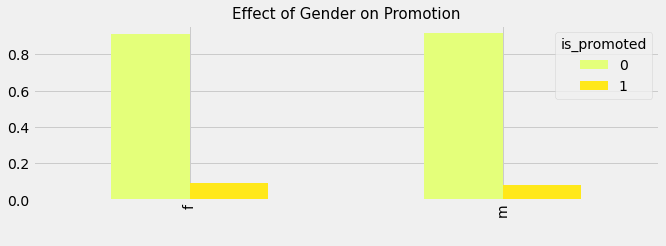

In [29]:
# Lets compare the Gender Gap in the promotion

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 3)
x = pd.crosstab(train['gender'], train['is_promoted'])
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False, color = colors)
plt.title('Effect of Gender on Promotion', fontsize = 15)
plt.xlabel(' ')
plt.show()

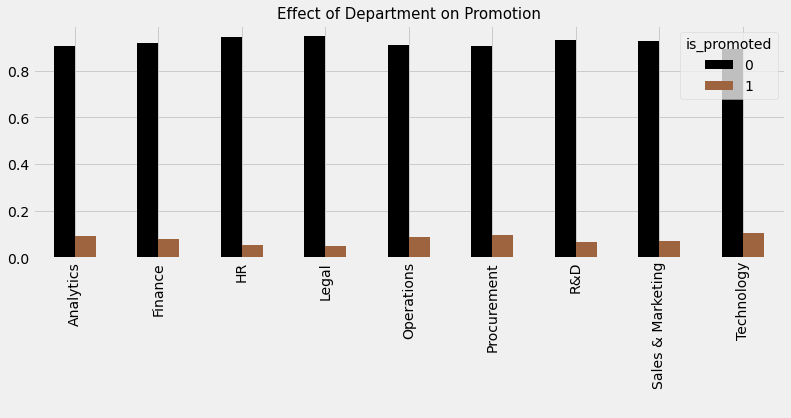

In [30]:
# lets compare the effect of different Departments and Promotion

plt.rcParams['figure.figsize'] = (12,4)
x = pd.crosstab(train['department'], train['is_promoted'])
colors = plt.cm.copper(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False, color = colors)
plt.title('Effect of Department on Promotion', fontsize = 15)
plt.xlabel(' ')
plt.show()

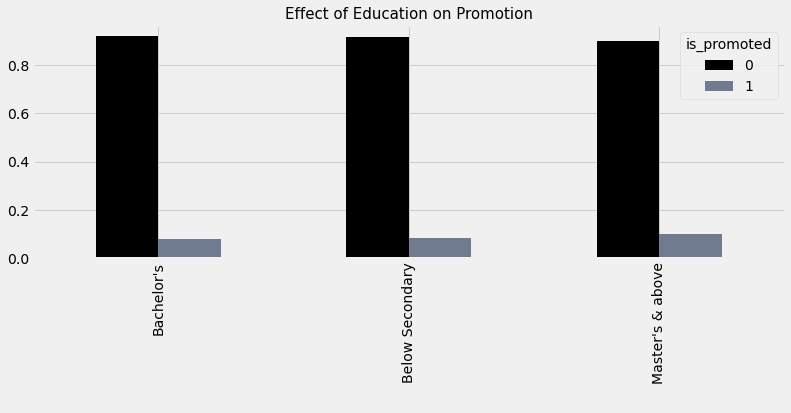

In [31]:
# lets compare the effect of Education and Promotion

plt.rcParams['figure.figsize'] = (12,4)
x = pd.crosstab(train['education'], train['is_promoted'])
colors = plt.cm.bone(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False, color = colors)
plt.title('Effect of Education on Promotion', fontsize = 15)
plt.xlabel(' ')
plt.show()

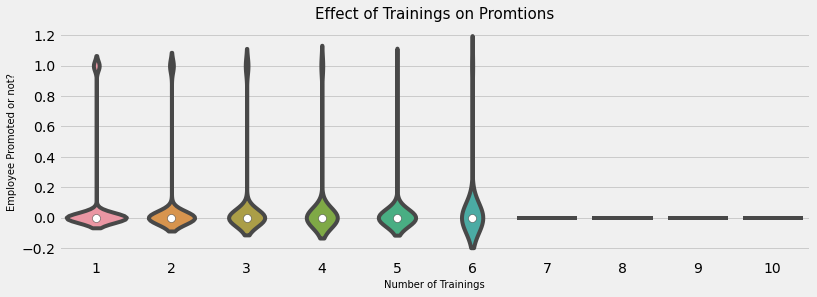

In [32]:
# checking the effect of number of trainings on promotion

sns.violinplot(train['no_of_trainings'], train['is_promoted'])
plt.title('Effect of Trainings on Promtions', fontsize = 15)
plt.xlabel('Number of Trainings', fontsize = 10)
plt.ylabel('Employee Promoted or not?', fontsize = 10)
plt.show()

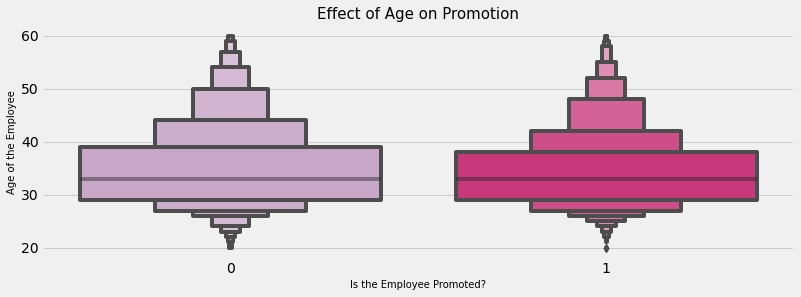

In [33]:
# Effect of Age on the Promotion

sns.boxenplot(train['is_promoted'], train['age'], palette = 'PuRd')
plt.title('Effect of Age on Promotion', fontsize = 15)
plt.xlabel('Is the Employee Promoted?', fontsize = 10)
plt.ylabel('Age of the Employee', fontsize = 10)
plt.show()

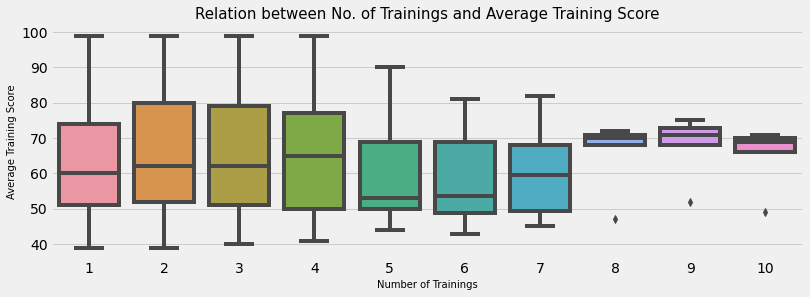

In [34]:
# lets check relation between number of trainings and average training score

sns.boxplot(train['no_of_trainings'], train['avg_training_score'])
plt.title('Relation between No. of Trainings and Average Training Score', fontsize = 15)
plt.xlabel('Number of Trainings', fontsize = 10)
plt.ylabel('Average Training Score', fontsize = 10)
plt.show()

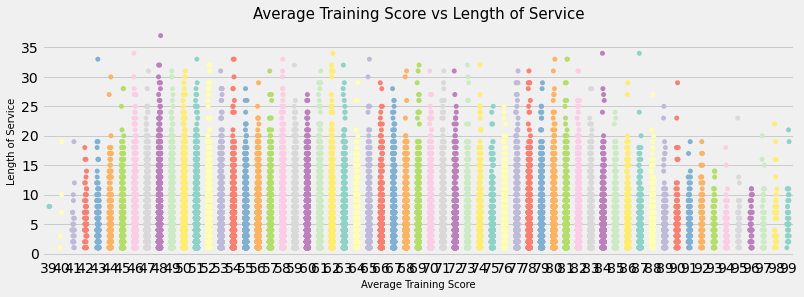

In [37]:
# lets check the relation between the length of service and the average training score

sns.stripplot(train['avg_training_score'], train['length_of_service'], palette = 'Set3')
plt.title('Average Training Score vs Length of Service', fontsize = 15)
plt.xlabel('Average Training Score', fontsize = 10)
plt.ylabel('Length of Service', fontsize = 10)
plt.show()

In [38]:
#Feature Engineering

In [39]:
# lets create some extra features from existing features to improve our Model

# creating a Metric of Sum
train['sum_metric'] = train['awards_won?']+train['KPIs_met >80%'] + train['previous_year_rating']
test['sum_metric'] = test['awards_won?']+test['KPIs_met >80%'] + test['previous_year_rating']

# creating a total score column
train['total_score'] = train['avg_training_score'] * train['no_of_trainings']
test['total_score'] = test['avg_training_score'] * test['no_of_trainings']

In [40]:
# lets remove some of the columns which are not very useful for predicting the promotion.

# we already know that the recruitment channel is very least related to promotion of an employee, so lets remove this column
# even the region seems to contribute very less, when it comes to promotion, so lets remove it too.
# also the employee id is not useful so lets remove it.

train = train.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)
test = test.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)

# lets check the columns in train and test data set after feature engineering
train.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'sum_metric',
       'total_score'],
      dtype='object')

In [41]:
#Grouping Operations and Queries

In [42]:
# lets group the employees based on their Education

train[['education','is_promoted']].groupby(['education']).agg(['count','sum'])

is_promoted      
                       count   sum
education                         
Bachelor's             39078  3130
Below Secondary          805    67
Master's & above       14925  1471

In [43]:
## lets use the interactive function to make it more reusable

@interact
def group_operations(column = list(train.select_dtypes('object').columns)):
    return train[[column, 'is_promoted']].groupby([column]).agg('count').style.background_gradient(cmap = 'Wistia')

interactive(children=(Dropdown(description='column', options=('department', 'education', 'gender'), value='dep…

In [44]:
# lets get the names of all the employees who have taken trainings more than 7 Times

@interact
def check(column = 'no_of_trainings', x = 5):
    y = train[train['no_of_trainings'] > x]
    return y['is_promoted'].value_counts()

interactive(children=(Text(value='no_of_trainings', description='column'), IntSlider(value=5, description='x',…

In [45]:
# lets remove the above two columns as they have a huge negative effect on our training data

# lets check shape of the train data before deleting two rows
print("Before Deleting the above two rows :", train.shape)

train = train.drop(train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 40)].index)

# lets check the shape of the train data after deleting the two rows
print("After Deletion of the above two rows :", train.shape)

Before Deleting the above two rows : (54808, 13)
After Deletion of the above two rows : (54806, 13)


In [46]:
# lets check how many of the employees have greater than 30 years of service and still do not get promotion

@interact
def check_promotion(x = 20):
    x = train[(train['length_of_service'] > x)]
    return x['is_promoted'].value_counts()
   

interactive(children=(IntSlider(value=20, description='x', max=60, min=-20), Output()), _dom_classes=('widget-…

In [47]:
#Dealing with Categorical Columns

In [48]:
# lets start encoding these categorical columns to convert them into numerical columns

# lets encode the education in their degree of importance 
train['education'] = train['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
test['education'] = test['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))

# lets use Label Encoding for Gender and Department to convert them into Numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['department'] = le.fit_transform(train['department'])
test['department'] = le.fit_transform(test['department'])
train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.fit_transform(test['gender'])

# lets check whether we still have any categorical columns left after encoding
print(train.select_dtypes('object').columns)
print(test.select_dtypes('object').columns)

Index([], dtype='object')
Index([], dtype='object')


In [49]:
# lets check the data after encoding
train.head(3)

department  education  gender  no_of_trainings  age  previous_year_rating  \
0           7          3       0                1   35                   5.0   
1           4          2       1                1   30                   5.0   
2           7          2       1                1   34                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   

   is_promoted  sum_metric  total_score  
0            0         6.0           49  
1            0         5.0           60  
2            0         3.0           50

In [50]:
# lets split the target data from the train data

y = train['is_promoted']
x = train.drop(['is_promoted'], axis = 1)
x_test = test

# lets print the shapes of these newly formed data sets
print("Shape of the x :", x.shape)
print("Shape of the y :", y.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x : (54806, 12)
Shape of the y : (54806,)
Shape of the x Test : (23490, 12)


In [51]:
# It is very important to resample the data, as the Target class is Highly imbalanced.
# Here We are going to use Over Sampling Technique to resample the data.
# lets import the SMOTE algorithm to do the same.

#from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_sample(x, y.values.ravel())

# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

NameError: name 'SMOTE' is not defined

In [52]:
# Lets use Logistic Regression to classify the data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

NameError: name 'x_train' is not defined